## What is a term deposit A term deposit 

A term deposit  a type of financial product offered by banks and other financial institutions, where an individual or a business deposits a sum of money for a fixed period of time, typically ranging from a few months to several years. In return, the depositor earns a fixed interest rate on the deposited amount.

Term deposits are considered a low-risk investment option because they have a guaranteed return on investment, and the deposited funds are usually not accessible until the end of the term without incurring a penalty. This feature makes term deposits popular among conservative investors and individuals looking for a safe place to park their savings.

Common types of term deposits include certificates of deposit (CDs), fixed deposits (FDs), and time deposits. The specific terms, interest rates, and conditions may vary depending on the financial institution and the country's regulations.What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia:

### Objectives

In this work, we have collected a variant of the bank marketing data set pertaining to a Portuguese financial
institution consisting of 45211 instances. Attribute subset selection has been performed on the data set with selected features used in classification. We will perform a comparisons of the four standard classifiers,
namely `Logisitic Regression`, `Decision Tree`, `Random Forest`, `Support Vector Machine` and `K-Nearest Neighbors`


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Import the dataset and perform sanity check

In [2]:
##Dataset information: https://archive.ics.uci.edu/ml/datasets/bank+marketing
dataset_raw = pd.read_csv('bank-full.csv', sep='[,]',
                 engine='python')

# clean up the colum string
dataset_raw.columns = dataset_raw.columns.str.replace('"', '')
dataset_raw = dataset_raw.replace(to_replace='"', value='', regex=True)
dataset = dataset_raw.copy()
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Check the datasets column datatypes

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


**Result**
 - The full dataset has 45211 rows and 17 columns. Some of the columns are categorical and will require encoding
 
 

#### Dataset Features

- age (numeric)
- job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'tertiary,'secondary','primary','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical:'cellular','telephone')
- day: last contact day of the month (numeric 1 -31)
- month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
- duration: last contact duration, in seconds (numeric).
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

**Output variable (desired target)**  
- y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source**  
- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Exploratory Data Analysis
The main goal of EDA is to gain insights and make discoveries from the data, and to formulate hypotheses that can be tested using statistical methods. The steps included in our EDA process will include 

**Checking for missing data**
- Find Missing Values
- Find Features with one value


**Explore the Categorical Features**
- List the Categorical features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label

**Explore the Numerical Features**
- Find Numerical Features
- Distribution of  Numerical Features
- Relation between  numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

**Explore Target variables** 
- Check the Data set is balanced or not based on target values in classification

### Cleaning the data 


#### Find Missing Values

In [4]:
missing_values = dataset.isna().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**Result**
- There are no missing values in the dataset 

#### Find columns with a single value representing a majority of the values

In [5]:
#Checks if any non-binary columns in a dataframe have a single value representing the majority of the values.
def check_majority(df):
    majority_cols = []
    
    for col in df.columns:
        # check if column is not binary (only 2 unique values)
        if len(df[col].unique()) > 2:
            # get value counts of each unique value in the column
            value_counts = df[col].value_counts()
            # check if one value represents more than 80% of the values in the column
            if value_counts.iloc[0] / len(df[col]) > 0.8:
                majority_cols.append(col)
    
    return majority_cols
check_majority(dataset)

['pdays', 'previous', 'poutcome']

**Result**
- `pdays`, `previous` and `poutcome` have a single value presenting a majority of the values. Next check for actual values for this columns to get more insite

In [6]:
### Check the value of pdays (number of days that passed by after the client was last contacted from a previous campaign)
dataset.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [7]:
### Check the value of previous (number of contacts performed before this campaign and for this client)
dataset.groupby(['y','previous']).size()

y    previous
no   0           33570
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Length: 66, dtype: int64

In [8]:
### Check the value of poutcome (outcome of the previous marketing campaign)
dataset.groupby(['y','poutcome']).size()

y    poutcome
no   failure      4283
     other        1533
     success       533
     unknown     33573
yes  failure       618
     other         307
     success       978
     unknown      3386
dtype: int64

**Result**
- `pdays` has one value `-1` prepresenting a majority of the values, this value presents unknown and can be droped 
- `previous` has one value `0` which is meaningfull to the data, indicating number of contacts
- `poutcome` has a large number of `unknown` values from the previous marketing campain. Since `failure` and `success` are meaninfull to the dataset, they will be converted to `other` to inform the classification model.

### Explore the Categorical Features

#### List the Categorical features

In [9]:
def count_categories(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    # Count the number of unique categories in each column
    category_counts = categorical_columns.nunique()
    
    return category_counts


# Count the number of categories in all categorical features

# Create a categorical dataframe 
dataset_categorical = dataset.drop("y", axis=1)


category_counts = count_categories(dataset_categorical)
print("Number of categories in categorical features:\n", category_counts)

Number of categories in categorical features:
 job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64


**Result**

- There are 9 categorical features and job and month have the highest number of categorical features. `day` (last contact day of the month), is a numeric with value (1 -31), for our analysis it will be considered a categorical value

#### Plot the categorical feature distribution

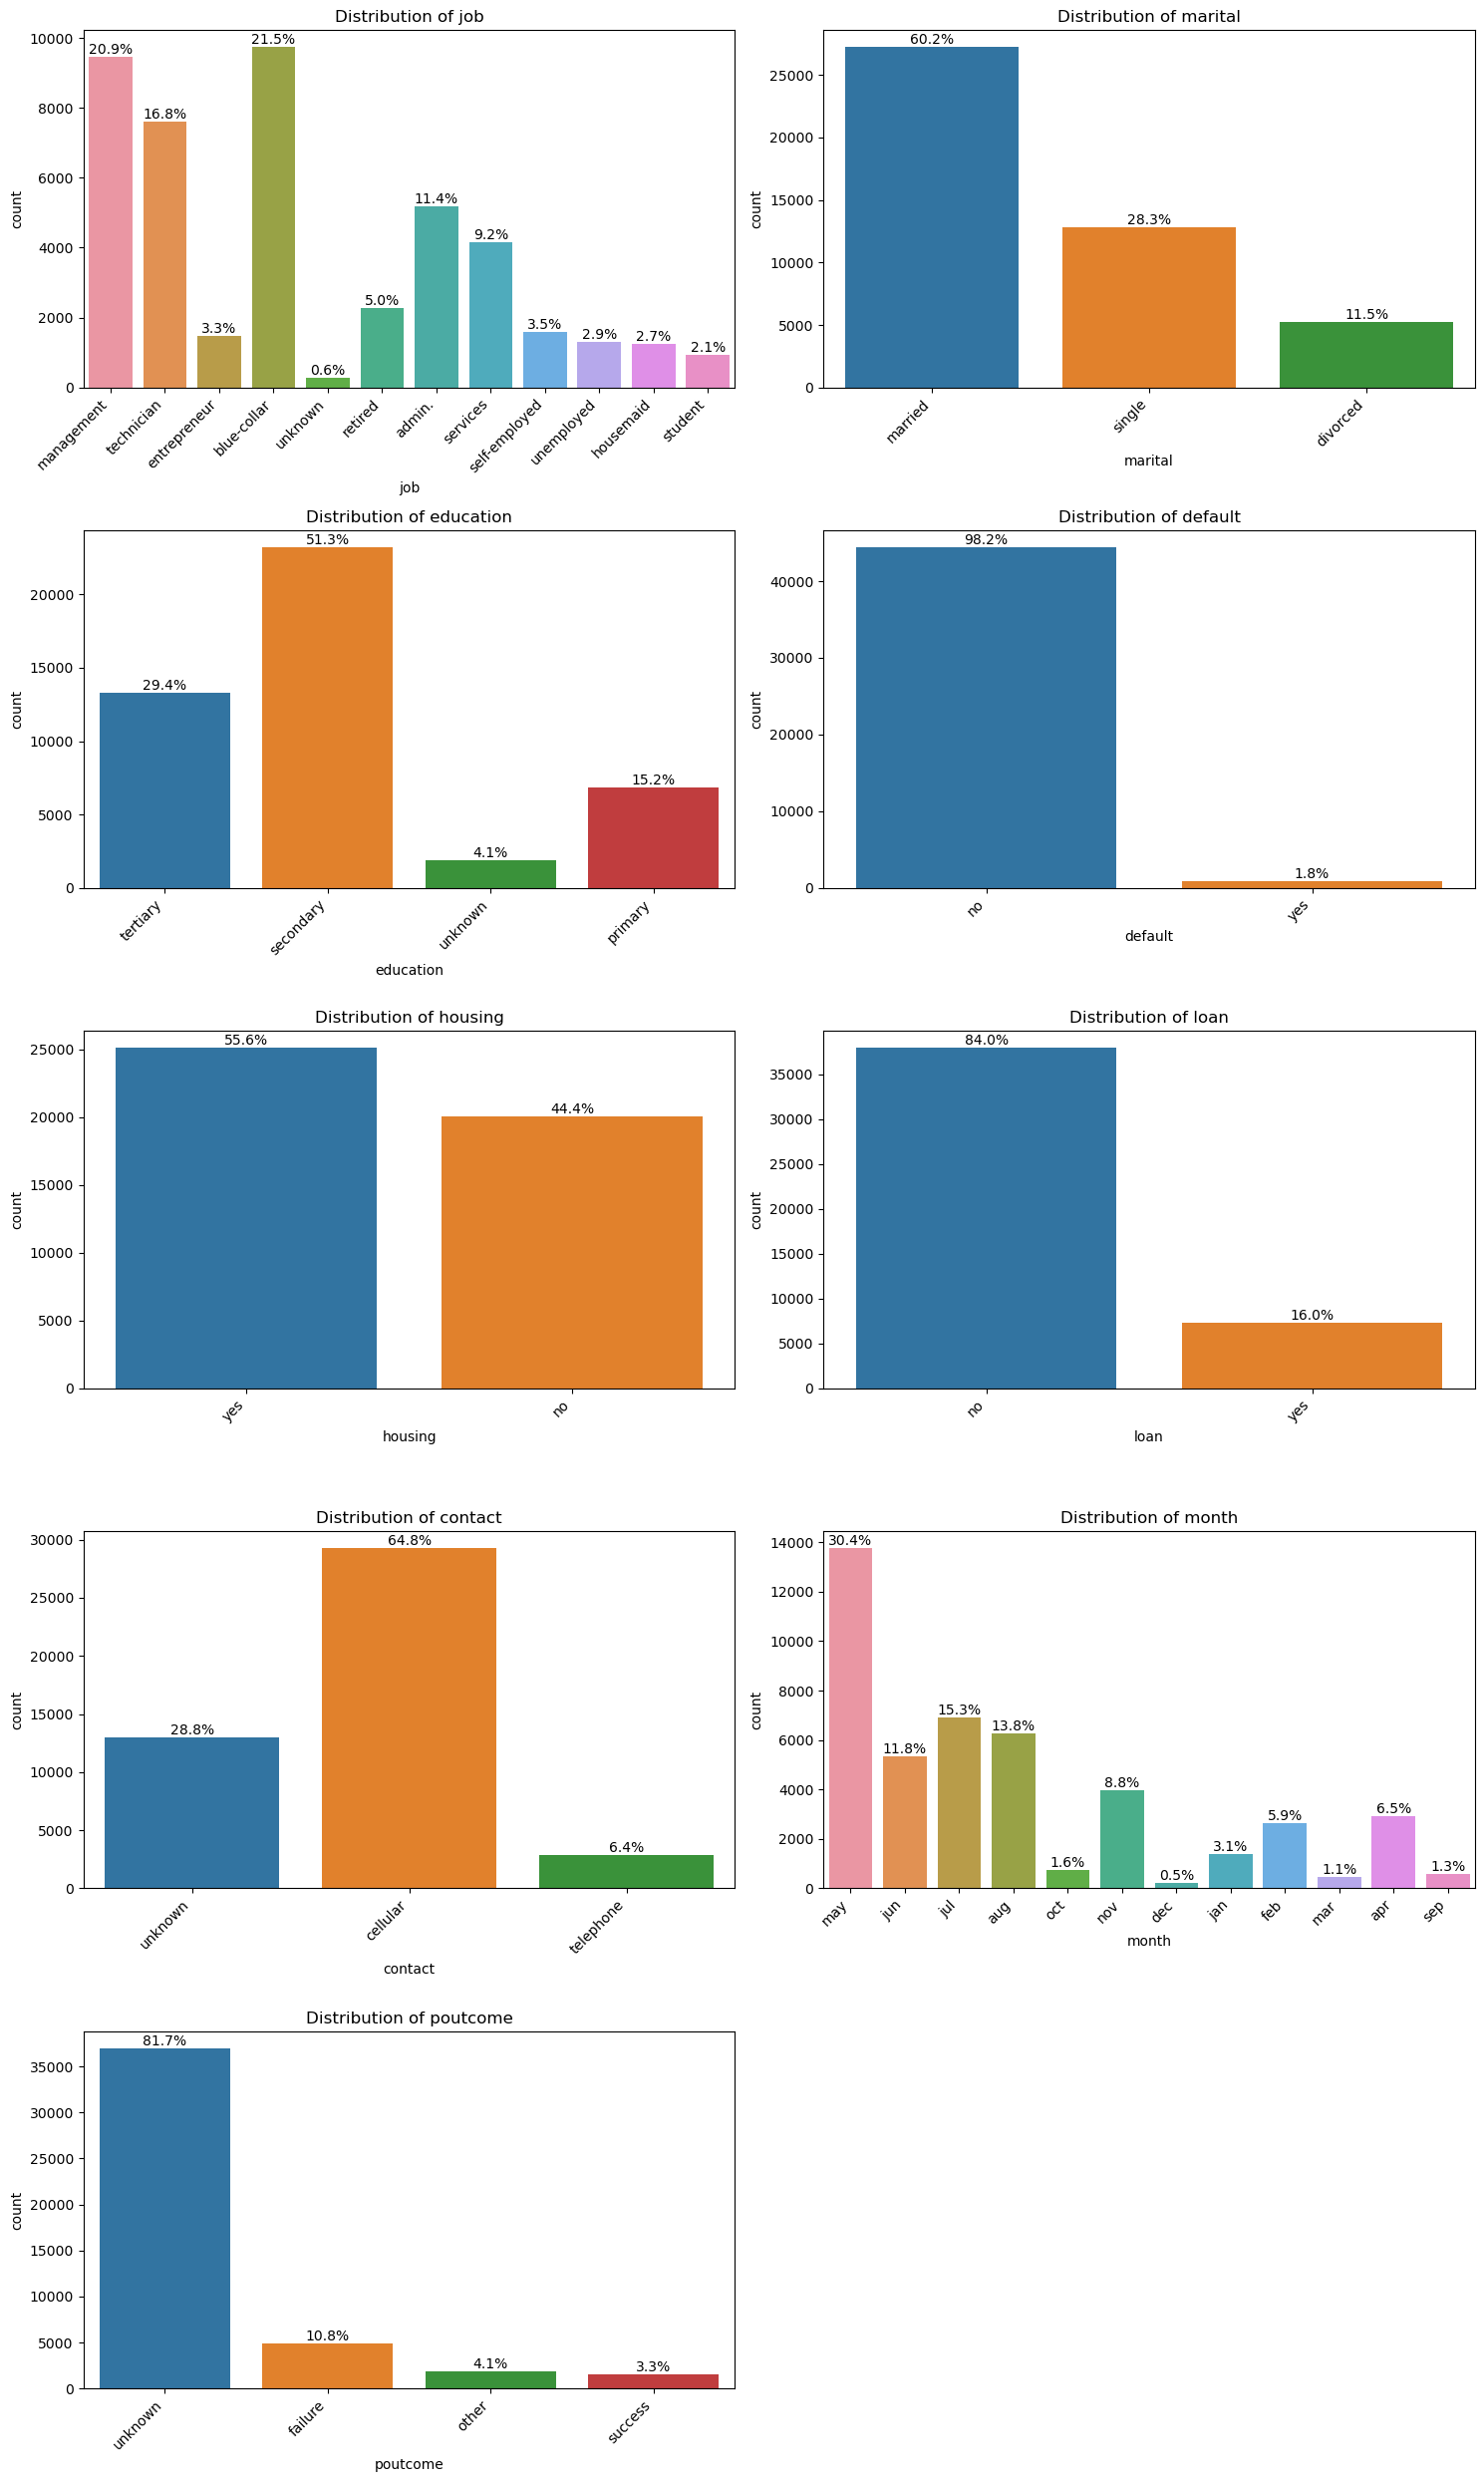

In [10]:
def plot_categorical_distribution(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    # Determine the number of rows and columns for the subplots grid
    n_cols = 2
    n_rows = int(np.ceil(len(categorical_columns.columns) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Function to annotate bars with percentage values
    def annotate_bars(ax, column):
        total = len(column)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # Plot the distribution of each categorical column
    for idx, column in enumerate(categorical_columns.columns):
        ax = axes[idx]
        sns.countplot(x=column, data=categorical_columns, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        annotate_bars(ax, categorical_columns[column])

    # Remove any unused subplots
    for idx in range(len(categorical_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()
plot_categorical_distribution(dataset_categorical)

**Result**
- job types blue collar (20.5%), management (21.5%) and admin (11.4%) represent over 50% of the records
- 4% of the educational records were uknown, **we decided to replace this values with the mean of primary, secondary and tertiary education**
- dataset has a high number of records with married couples at 60% 
- a large number of records did not have an existing loan (84%)
- 92% of the records did not have credit in default
- 68.4% of the individuals contacted by the marketing campain by cellphone. **A large number of values were unknown (28%) we decided to replace this value with the mean.** 
- Over 30% of the contacts were made in the month of March
- Over 80% of the previous marketing campain (poutotcome) is unknown. **There is a possibility that this feature would introduce noise in our dataset. In the inital run, we decided to keep this feature because the outcome of the previous compain can influence decision and fold other into unknown category**

#### Relationship between Categorical Features and Label

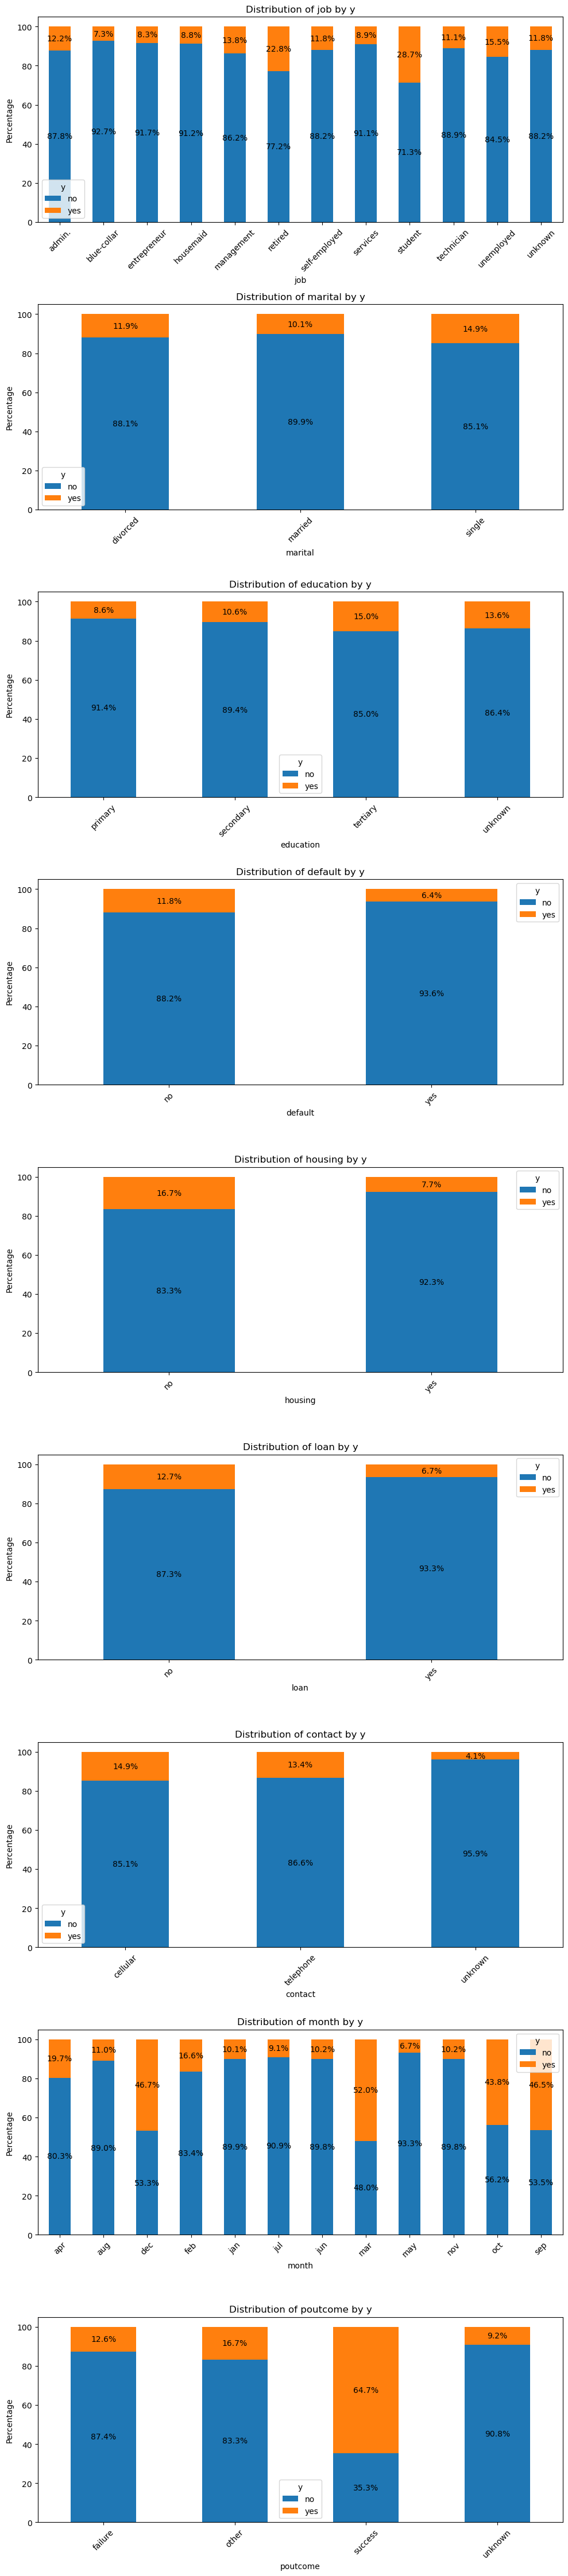

In [11]:
def plot_categorical_relationship(df, target_column):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    # Exclude the target variable column from the categorical columns
    categorical_columns = categorical_columns.drop(columns=[target_column], errors='ignore')

    # Set up the figure and axis for subplots
    n_cols = len(categorical_columns.columns)
    fig, axes = plt.subplots(nrows=n_cols, figsize=(10, 5 * n_cols))

    # Plot the distribution of each categorical column
    for idx, column in enumerate(categorical_columns.columns):
        # Create a cross-tabulation with the target variable
        crosstab = pd.crosstab(df[column], df[target_column], normalize='index') * 100

        # Create the stacked bar plot with percentages
        crosstab.plot.bar(stacked=True, ax=axes[idx], rot=45)

        # Annotate the bars with percentage values
        for p in axes[idx].patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axes[idx].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                               ha='center', va='center', fontweight='normal')

        # Set plot title and labels
        axes[idx].set_title(f'Distribution of {column} by {target_column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Percentage')

    # Display the plot
    plt.tight_layout()
    plt.show()
    
plot_categorical_relationship(dataset, "y")

**Result**

- Retired clients (22%) and students(28.2%) have a high interest on deposits
- records contacted in the month of March (52%), September (43%), October (46%) and December (46%) show high interest to deposits
- For records with a loan, their intrest in a term deposit drops by half to (6%)
- If the outcome of the previous marketing campaign was a `success` then high possibilty (64%) of opening a term deposit


### Explore the Numerical Features


#### Describe the numerical features

In [12]:
dataset.describe()
#profile report of each variable
#pandas_profiling.ProfileReport(dataset)

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Result**   

- There are 7 numerical features

#### Plot the distribution of Numerical Features

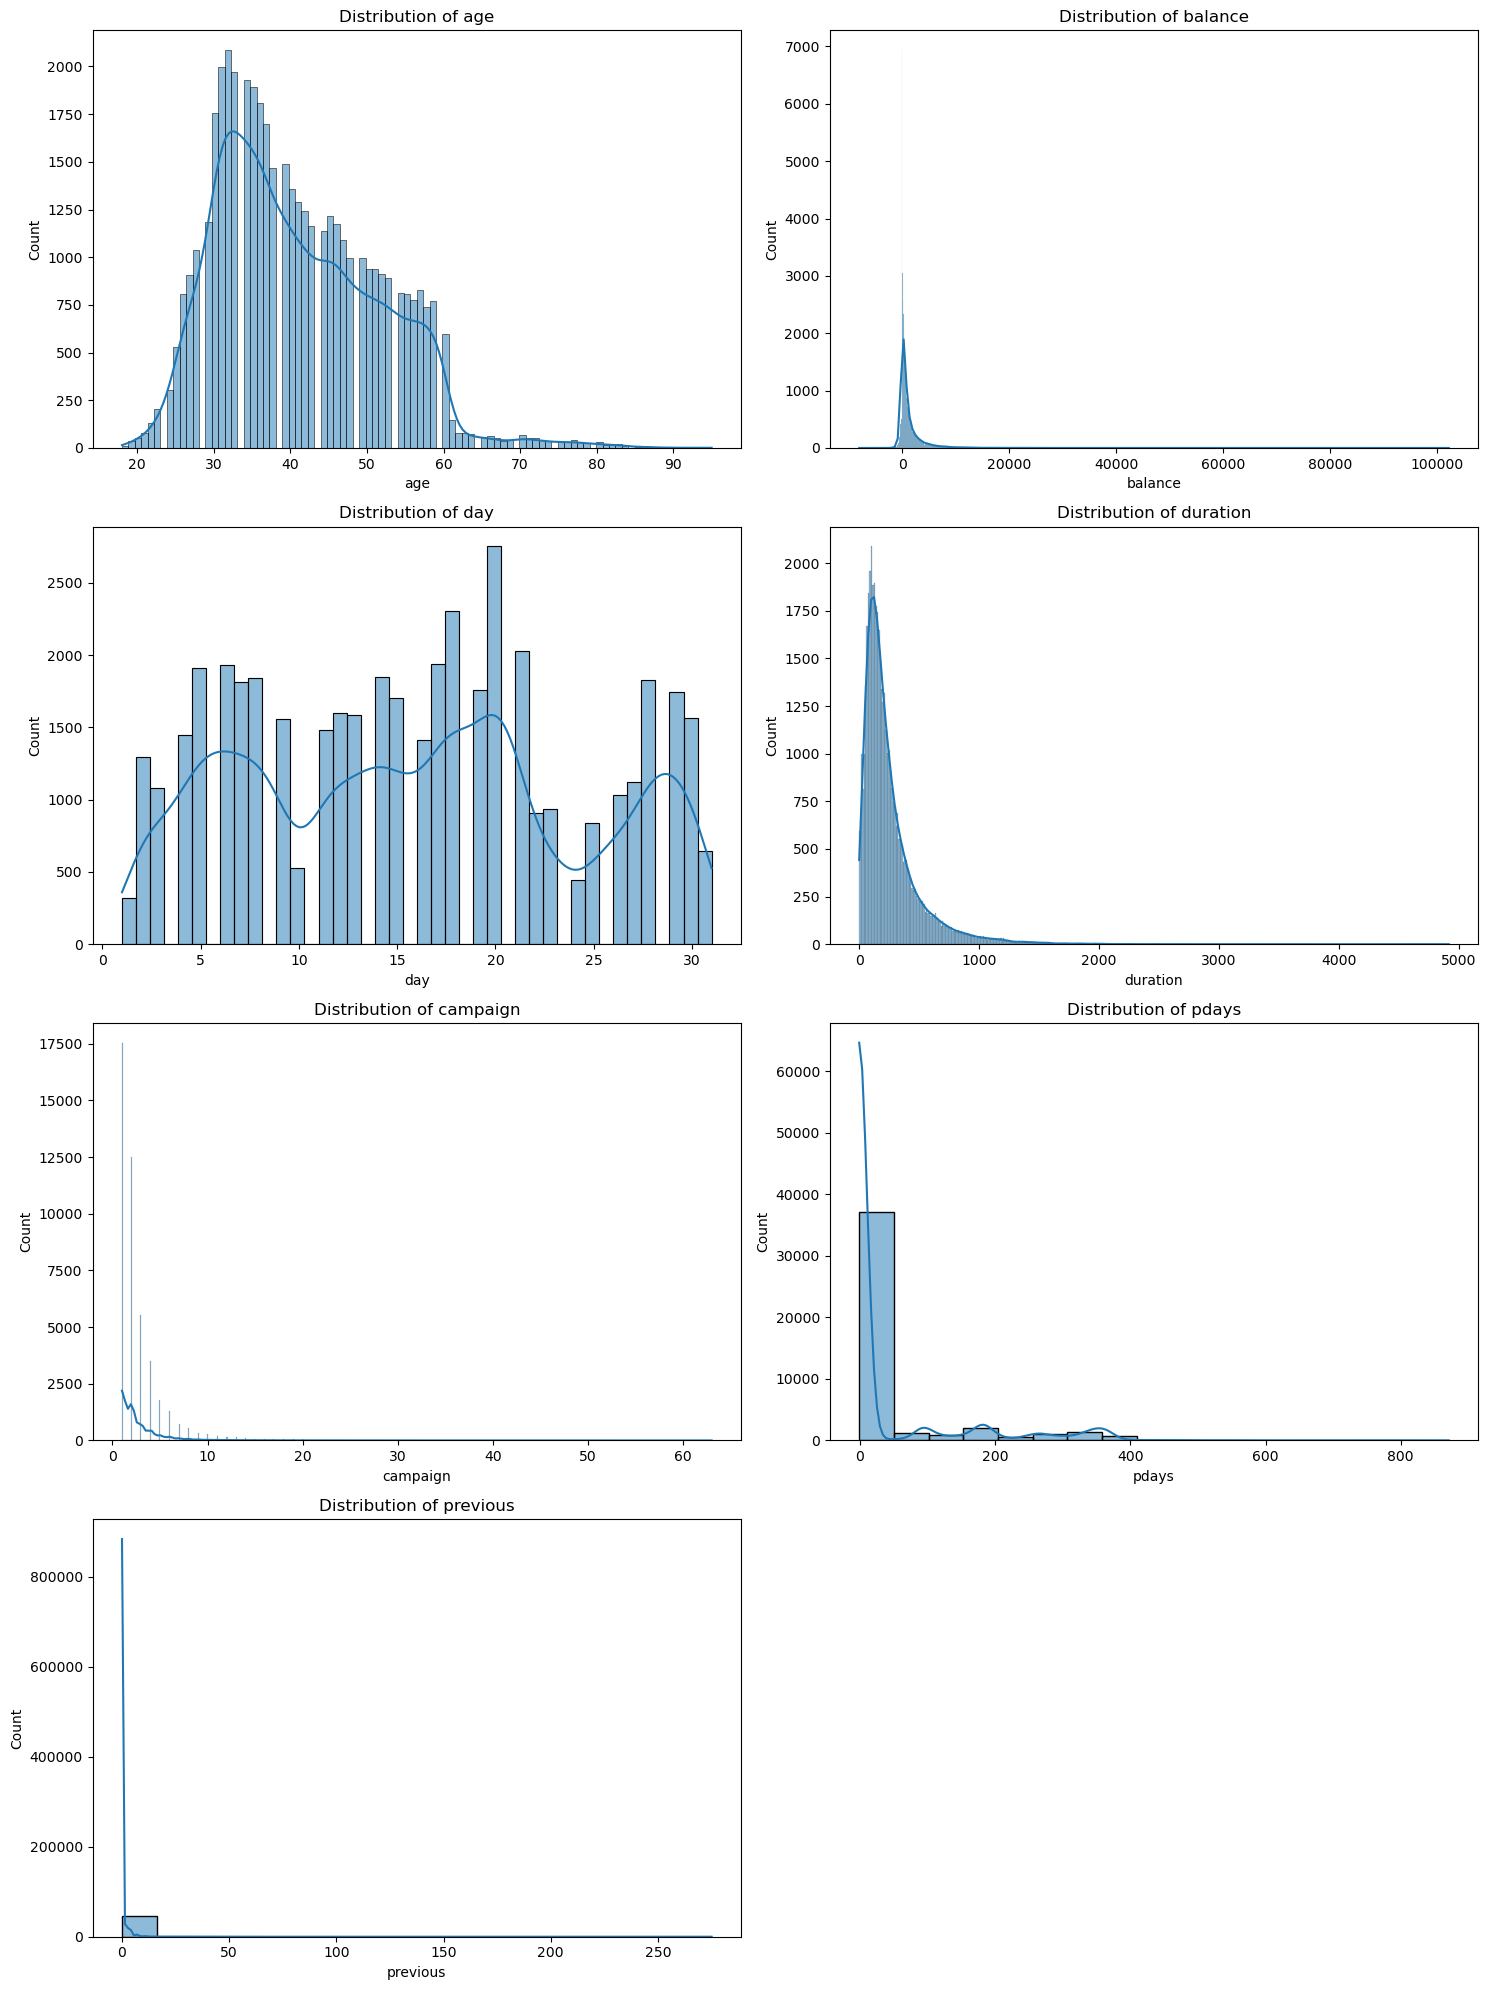

In [13]:
def plot_numerical_distribution(df):
    # Select columns with numeric data types (float and integer)
    numeric_columns = df.select_dtypes(include=['number'])

    # Set up the figure and axis for subplots
    n_rows = (len(numeric_columns.columns) + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten axes to make it easier to iterate

    # Plot the distribution of each numerical column
    for idx, column in enumerate(numeric_columns.columns):
        sns.histplot(data=df, x=column, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {column}')

    # Remove empty subplots
    for idx in range(len(numeric_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot the distribution of numerical features
plot_numerical_distribution(dataset)

**Result**
- Age seems to be normally distributed
- Balance, campain, duration of call, and previous contain are skewed to the left and contain outliers
- pdays is missing data and can be dropped
- Day (0-31) should be recategorized as a catagorical variable 

In [14]:
dataset.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

#### Relation between Continous numerical Features and Labels

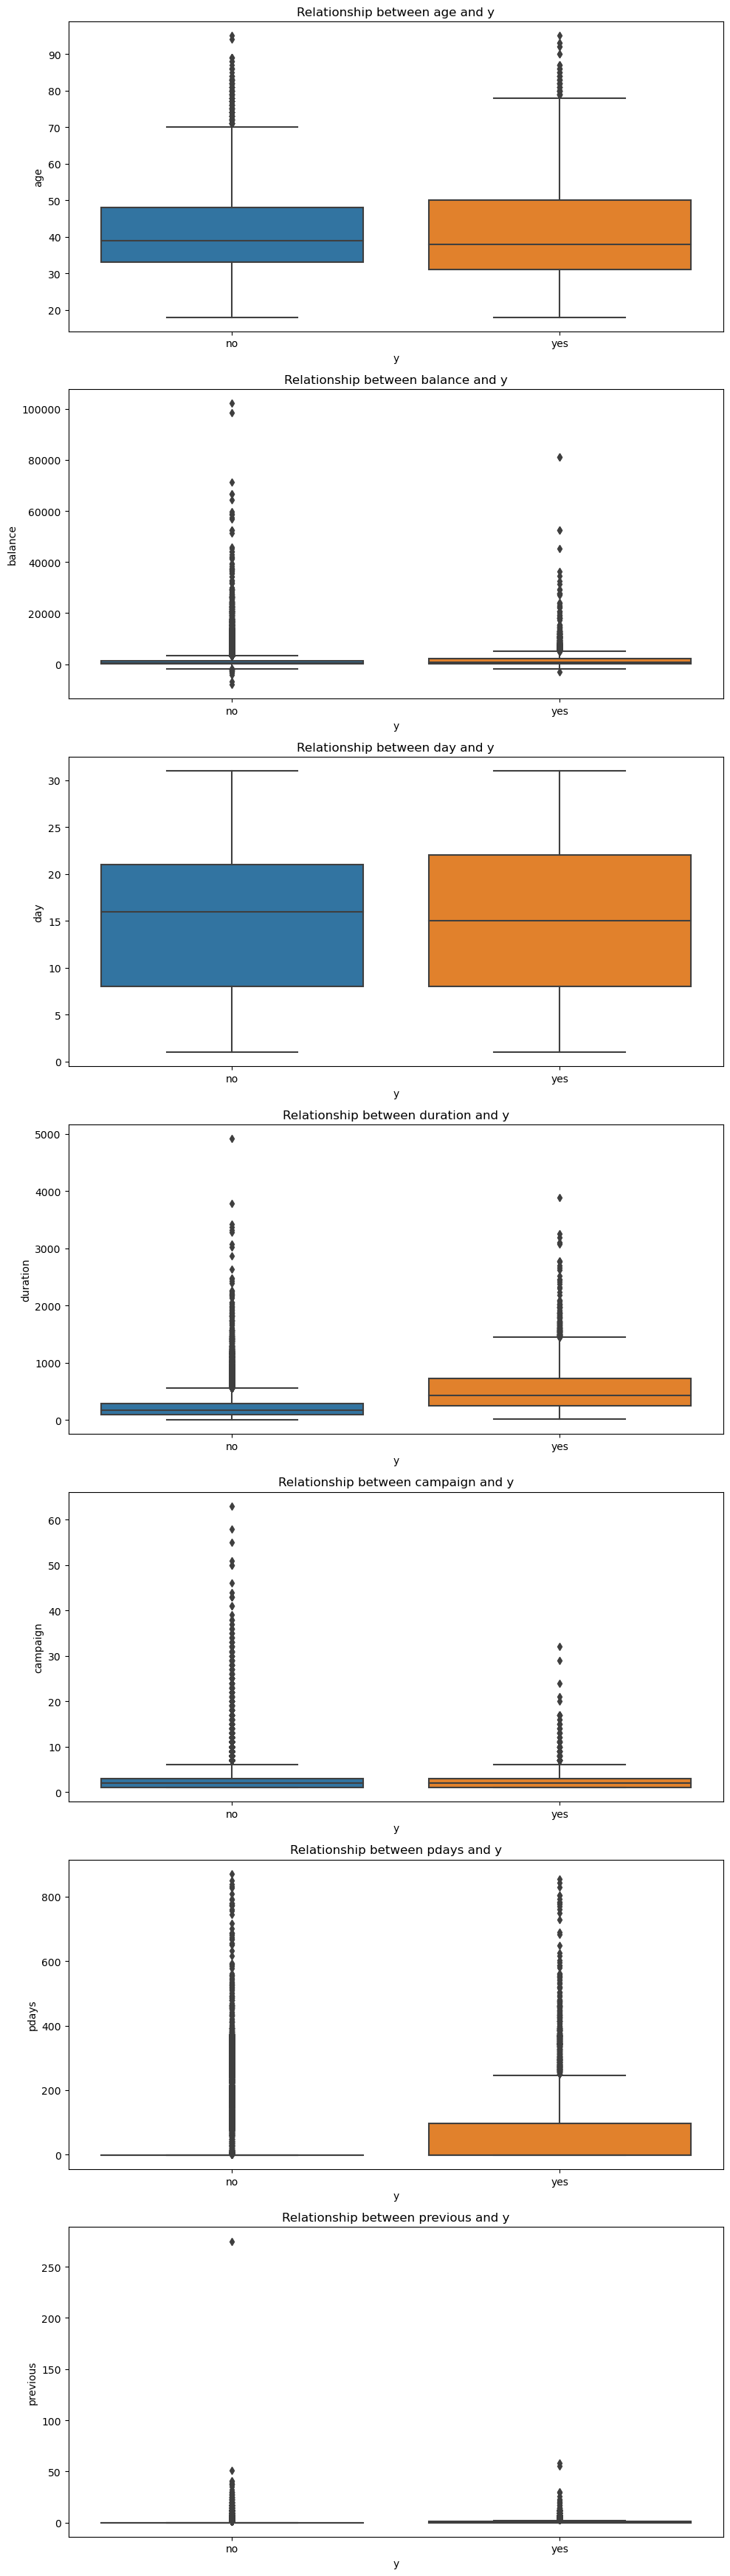

In [15]:
def plot_boxplots_relationship(df, target_column):
    # Select columns with numeric data types (float and integer), excluding the target column
    numeric_columns = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')

    # Set up the figure and axis for subplots
    n_rows = len(numeric_columns.columns)
    fig, axes = plt.subplots(nrows=n_rows, figsize=(10, 5 * n_rows))
    axes = axes.flatten()  # Flatten axes to make it easier to iterate

    # Plot the boxplot for each numerical column
    for idx, column in enumerate(numeric_columns.columns):
        sns.boxplot(data=df, x=target_column, y=column, ax=axes[idx], orient='v')
        axes[idx].set_title(f'Relationship between {column} and {target_column}')
        axes[idx].set_ylabel(column)
        axes[idx].set_xlabel(target_column)

    # Display the plot
    plt.tight_layout()
    plt.show()

    
plot_boxplots_relationship(dataset, "y")

**Result**
- records with higher duration of call resuted in a yes
- records that were contacted later in the week 'days' resulted in a yes
- records that had a higher value for number of days that passed by after the client was last contacted resulted in a yes

#### Find Outliers in numerical features

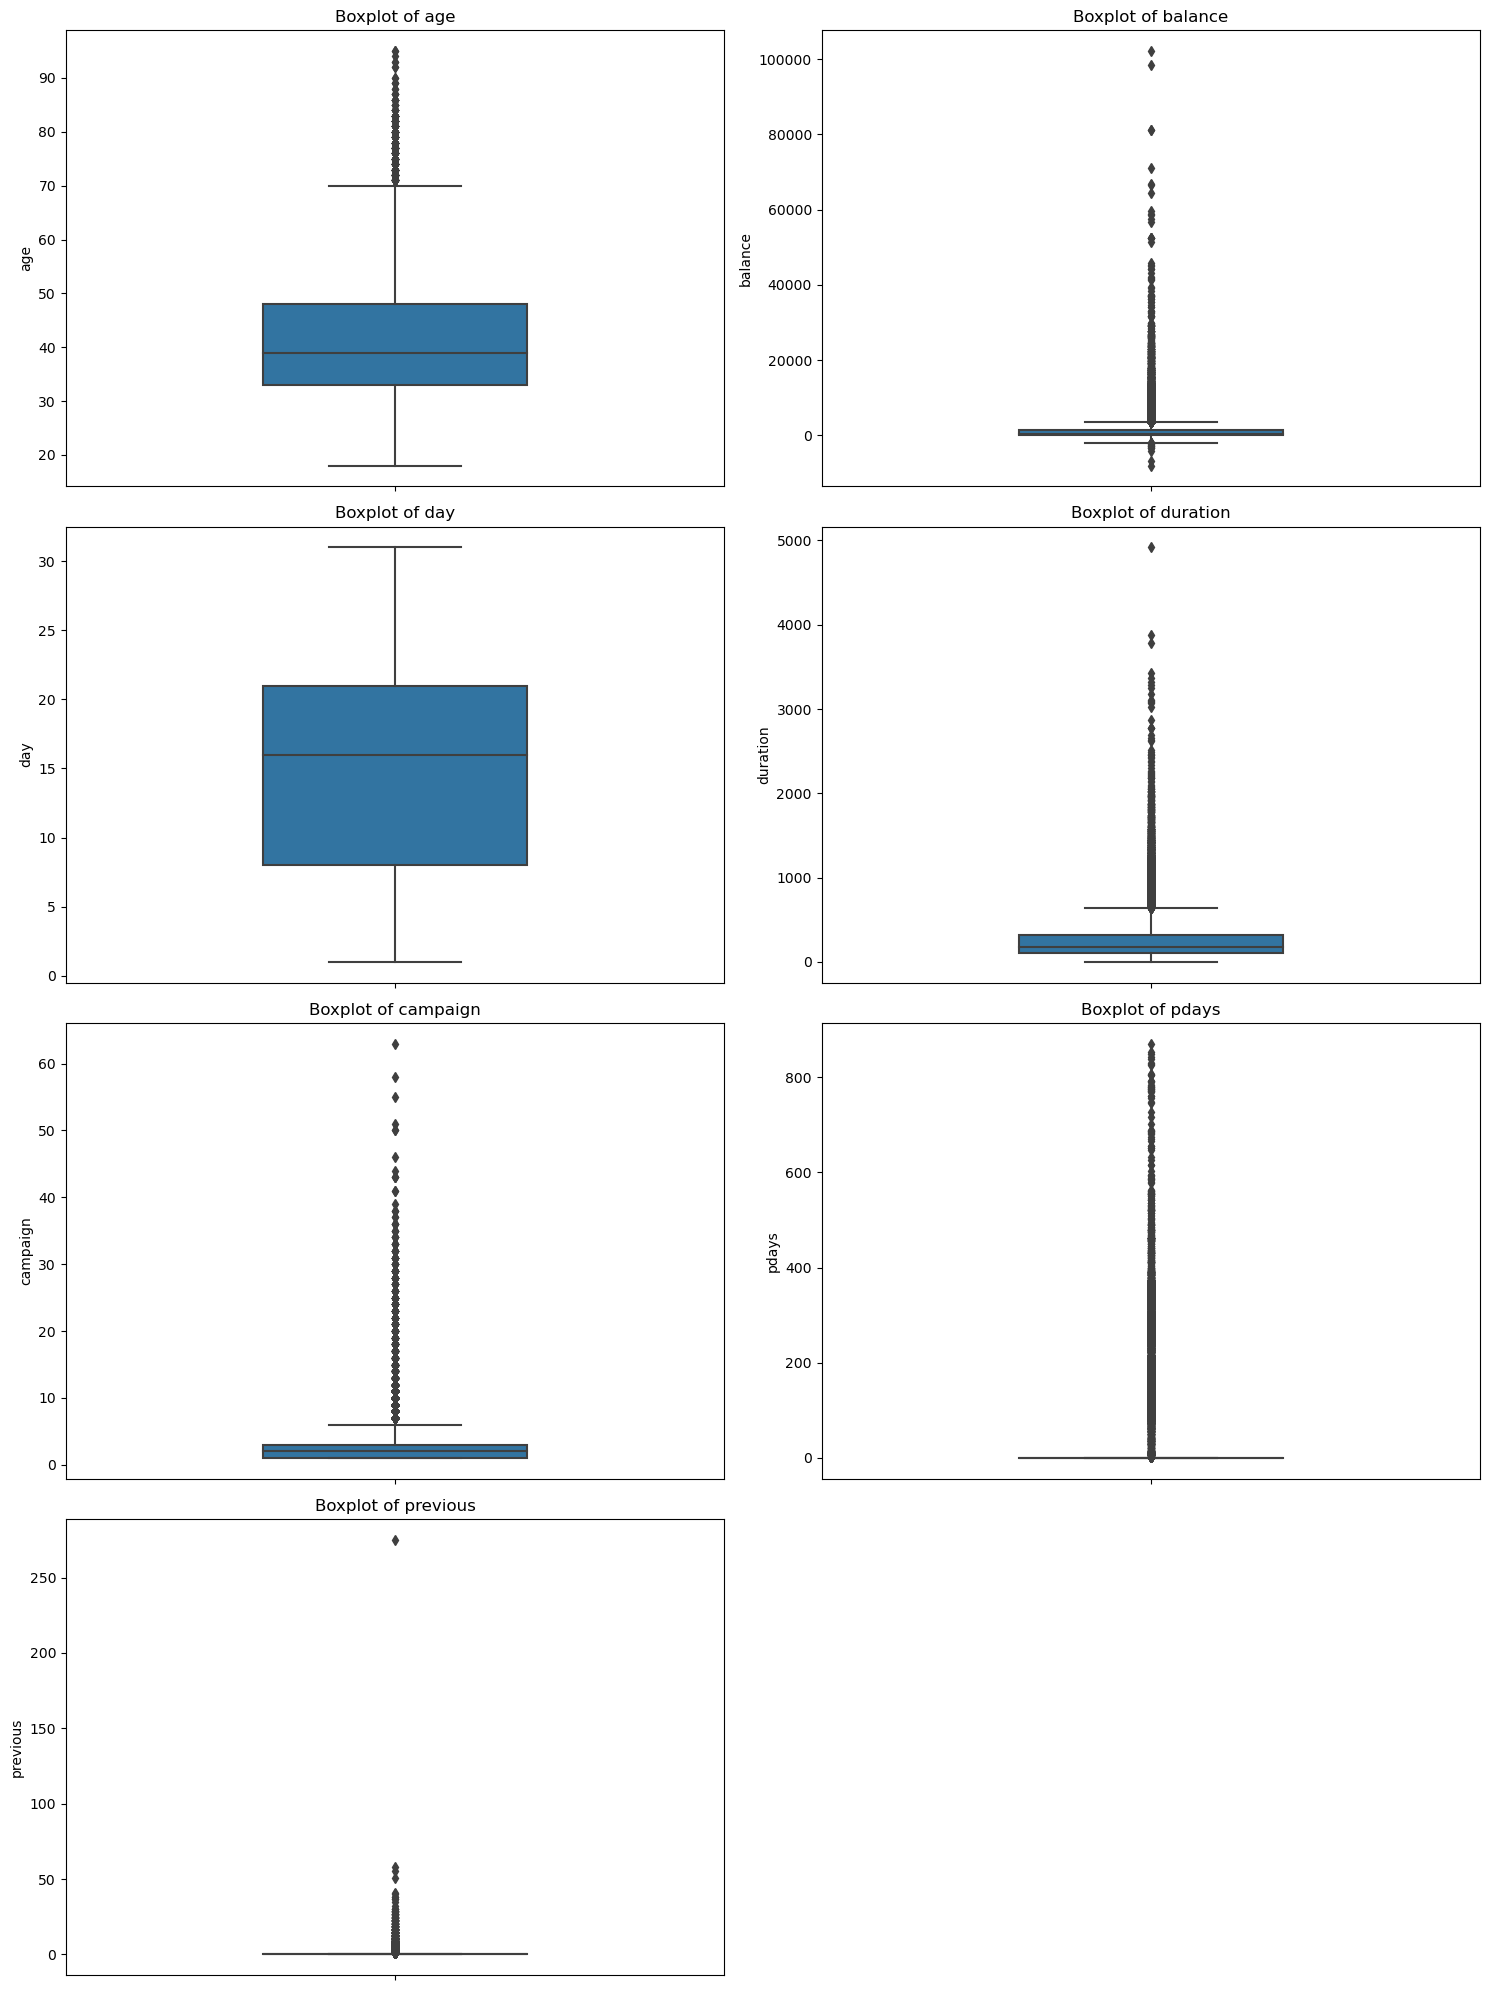

In [16]:
def plot_outliers_with_boxplot(df):
    # Select columns with numeric data types (float and integer)
    numeric_columns = df.select_dtypes(include=['number'])

    # Set up the figure and axis for subplots
    n_rows = (len(numeric_columns.columns) + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten axes to make it easier to iterate

    # Plot the boxplot for each numerical column
    for idx, column in enumerate(numeric_columns.columns):
        sns.boxplot(data=df, y=column, ax=axes[idx], width=0.4)
        axes[idx].set_title(f'Boxplot of {column}')

    # Remove empty subplots
    for idx in range(len(numeric_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()
    
# Plot the boxplots to show outliers in numerical features
plot_outliers_with_boxplot(dataset)

**Result**
- Age, balance, duration, previous have outliers

#### Correlation between numerical features

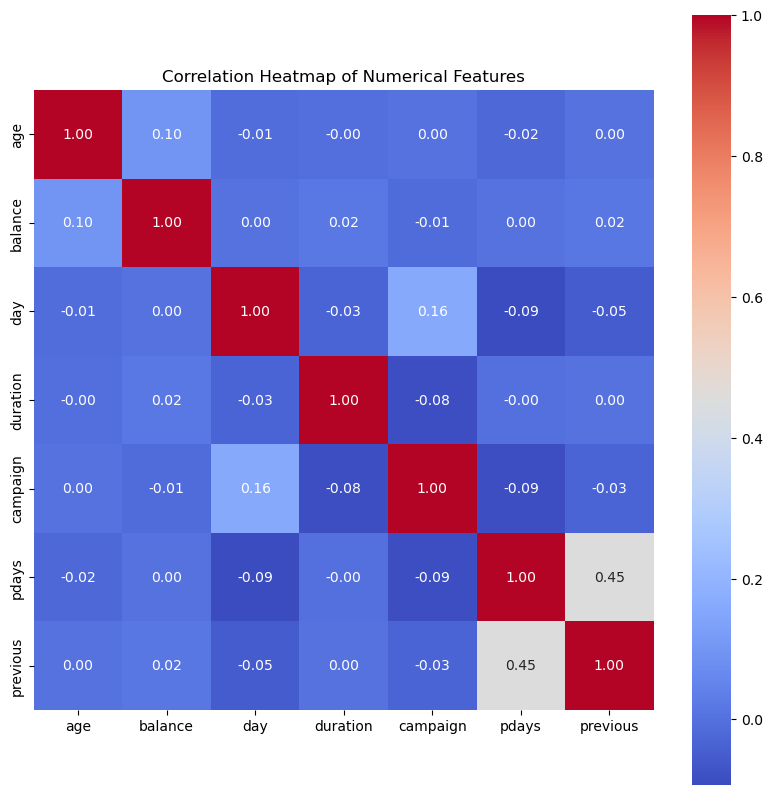

In [17]:
def plot_correlation_heatmap(df):
    # Select columns with numeric data types (float and integer)
    numeric_columns = df.select_dtypes(include=['number'])

    # Compute the correlation matrix
    corr_matrix = numeric_columns.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

plot_correlation_heatmap(dataset)

**Result**
- A correlation coefficient close to 1 indicates a strong positive correlation and A correlation coefficient close to -1 indicates a strong negative correlation. This means that as one variable increases, the other variable tends to decrease. Based on the heatmap, there are no strong positive or negative corelations

#### Check the target variable for imbalanced

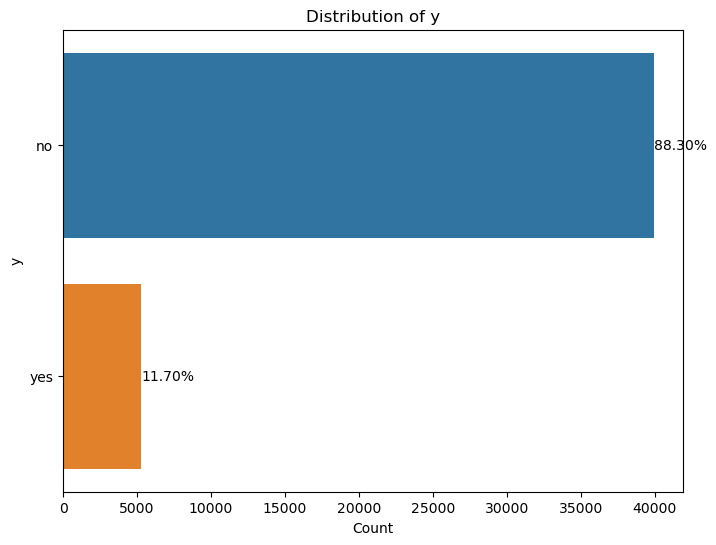

In [18]:
def plot_target_imbalance(df, target_column):
    # Compute the value counts and percentages
    counts = df[target_column].value_counts()
    percentages = counts / len(df) * 100

    # Create the bar plot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, y=target_column, order=percentages.index)

    # Annotate the bars with percentage values
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        ax.annotate(f'{percentages.iloc[i]:.2f}%', (width + 0.5, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontweight='normal')

    # Set plot title and labels
    plt.title(f'Distribution of {target_column}')
    plt.xlabel('Count')
    plt.ylabel(target_column)

    # Display the plot
    plt.show()
    
plot_target_imbalance(dataset, "y")

**Result**
- The dataset distribution imbalanced with 88.3% records as "no"

## Feature Engineering

#### Feature engineering overview

Feature engineering is an essential step in the machine learning process, where raw data is transformed into useful features that can improve the performance of a model. Below is a list feature engineering techniques that we explored 

1) Handling missing values:

    - Impute missing values using mean, median, or mode.
    - Use interpolation methods for time-series data.
    - Drop rows or columns with missing values.   

2) Encoding categorical variables:

    - One-hot encoding.
    - Label encoding.
    - Ordinal encoding.
    - Target-based encoding.  

3) Handling numerical features:  

    - Scaling: Standard scaling, Min-Max scaling, or Robust scaling.
    - Binning: Discretize continuous features into bins.
    - Log transformation: Apply logarithmic transformations to handle skewed distributions.
    - Polynomial features: Generate new features by combining existing features through mathematical operations (e.g., addition, multiplication, exponentiation).  

4) Handling date and time features:

    - Extract components such as year, month, day, day of the week, and time of the day.
    - Calculate time since a particular event (e.g., days since the last holiday).
    - Create cyclical features to capture patterns in time-series data.  

5) Feature selection:

    - Filter methods: Select features based on correlation, mutual information, or variance.
    - Wrapper methods: Use algorithms like forward selection, backward elimination, or recursive feature elimination.
    - Embedded methods: Utilize models with built-in feature selection, such as LASSO, Ridge Regression, or Random Forests.  

6) Dimensionality reduction:

    - Principal Component Analysis (PCA).
    - Linear Discriminant Analysis (LDA).
    - t-distributed Stochastic Neighbor Embedding (t-SNE).
    - Autoencoders.

7) Feature interactions:

    - Identify and create new features based on interactions between existing features that can improve model performance.

As a result of our explatory data analysis (1 - no missing values, 6 - no high dimention data , 7 - not explored becuase of time were not required) and we decided to examine the following

- Handling of missing values
- Handling numerical features: 
- Encoding categorical variables: 
- Handling date and time features:
- Feature selection:

### Handling of missing values

#### Drop columns with missing values

In [19]:
### Check the value of pdays
dataset.groupby(['y','pdays']).size()


y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [20]:
# 75% of values (33570) have a value of -1 indicating missing values, this column can safely be dropped
dataset.drop(['pdays'],axis=1, inplace=True)

### Handling numerical features

#### Remove Outliers

In [21]:
# Campain (number of contacts performed during this campaign and for this client)remove outliers in feature campaign...
# Remove all campain outliers
dataset.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

Text(0.5, 1.0, 'Boxplot of campaign')

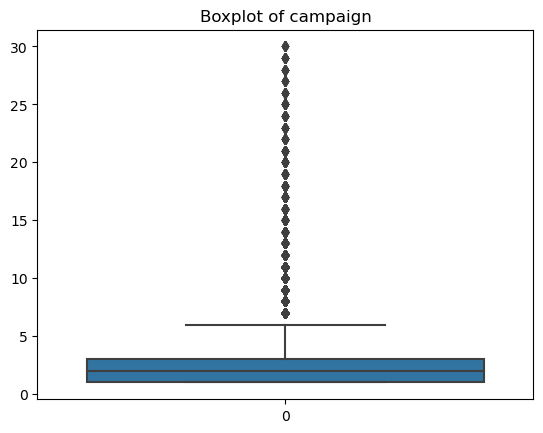

In [22]:
# Remove all the campain contacts greater than 31
dataset = dataset[dataset['campaign'] < 31]
# Create a boxplot
sns.boxplot(data=dataset['campaign'])
# Set the title for the boxplot
plt.title("Boxplot of campaign")
# Display the boxplot

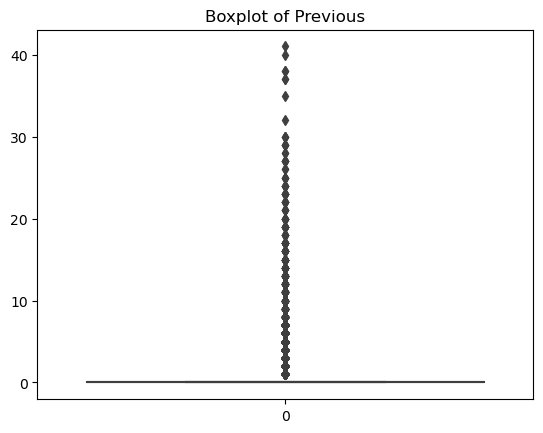

In [23]:
# Previous (number of contacts performed before this campaign and for this client)
# Remove outliers in feature previous
dataset = dataset[dataset['previous'] < 50]

# Remove all the campain contacts greater than 31
dataset.groupby(['y','previous'],sort=True)['previous'].count()

# Create a boxplot
sns.boxplot(data=dataset['previous'])
# Set the title for the boxplot
plt.title("Boxplot of Previous")
# Display the boxplot
plt.show()


### Handling of Categorical Variables

#### Label Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. It is great for binary conversions

In [24]:
def label_encode(df, cols):
    le = LabelEncoder()
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return df

cols = ['contact','loan', 'housing', 'default', 'housing', 'y']

dataset = label_encode (dataset, cols)

def label_unique(df, cols):
    for col in cols:
        print(df[col].unique())

label_unique(dataset, cols)

[2 0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]


#### Convert into a 5 level category

In [25]:
## Convert the Call duration Call into 5 category
def duration_category(dataset):
    dataset.loc[dataset['duration'] <= 102, 'duration'] = 1
    dataset.loc[(dataset['duration'] > 102) & (dataset['duration'] <= 180)  , 'duration'] = 2
    dataset.loc[(dataset['duration'] > 180) & (dataset['duration'] <= 319)  , 'duration'] = 3
    dataset.loc[(dataset['duration'] > 319) & (dataset['duration'] <= 645), 'duration'] = 4
    dataset.loc[dataset['duration']  > 645, 'duration'] = 5
    return dataset
duration_category(dataset)

dataset.groupby(['y','duration'],sort=True)['duration'].count()

y  duration
0  1           11032
   2           10865
   3           10022
   4            6378
   5            1565
1  1             124
   2             585
   3            1265
   4            1672
   5            1640
Name: duration, dtype: int64

#### Encoding of Categorical Variables

In [26]:
# fucntion to One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

# One Hot encoding of 3 variable 
dataset = encode(dataset, dataset.job)
dataset = encode(dataset, dataset.marital)
dataset = encode(dataset, dataset.education)
dataset = encode(dataset, dataset.poutcome)

# Drop tranfromed features
dataset.drop(['job', 'education', 'marital','poutcome'], axis=1, inplace=True)

In [27]:
print(dataset.day.unique())
print(dataset.month.unique())

# Cyclical Encoding of the date and month column 
def cyclical_encode_month_day(df, month_col, day_col):
    # Create a dictionary to map month names to month numbers
    month_name_to_number = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    
    # Convert the month names to month numbers
    df['month_number'] = df[month_col].map(month_name_to_number)
    
    # Calculate the total number of days in the year for each row
    days_per_month = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    df['day_of_year'] = df['month_number'].apply(lambda x: np.sum(days_per_month[:x - 1])) + df[day_col]
    
    # Apply cyclical encoding
    max_day_of_year = 365
    df[f'{day_col}_sin'] = np.sin(2 * np.pi * df['day_of_year'] / max_day_of_year)
    df[f'{day_col}_cos'] = np.cos(2 * np.pi * df['day_of_year'] / max_day_of_year)
    
    # Drop intermediate columns
    df.drop(['month_number', 'day_of_year'], axis=1, inplace=True)
    
    return df

cyclical_encode_month_day(dataset, 'month', 'day')
# Drop tranfromed features
dataset.drop(['month', 'day'], axis=1, inplace=True)

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [28]:
dataset

,age,default,balance,housing,loan,contact,duration,campaign,previous,y,...,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos
0,58,0,2143,1,0,2,3,1,0,0,...,0,0,1,0,0,0,0,1,0.835925,-0.548843
1,44,0,29,1,0,2,2,1,0,0,...,0,1,0,0,0,0,0,1,0.835925,-0.548843
2,33,0,2,1,1,2,1,1,0,0,...,0,1,0,0,0,0,0,1,0.835925,-0.548843
3,47,0,1506,1,0,2,1,1,0,0,...,0,0,0,1,0,0,0,1,0.835925,-0.548843
4,33,0,1,0,0,2,3,1,0,0,...,0,0,0,1,0,0,0,1,0.835925,-0.548843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,0,5,3,0,1,...,0,0,1,0,0,0,0,1,-0.687053,0.726608
45207,71,0,1729,0,0,0,4,2,0,1,...,1,0,0,0,0,0,0,1,-0.687053,0.726608
45208,72,0,5715,0,0,0,5,5,3,1,...,0,1,0,0,0,0,1,0,-0.687053,0.726608
45209,57,0,668,0,0,1,4,4,0,0,...,0,1,0,0,0,0,0,1,-0.687053,0.726608


## Model Selection 

We chose to evaluate five baseline models then do hyperparameter tunning try increase their baseline performance. We chose to use F1 score which is the harmonic mean of precision and recal to track model performance. Models evaluated

- LogisticRegression
- KNeighborsClassifier
- RandomForestClassifier
- Support Vector Machine 
- DecisionTreeClassifier

- **Interpretability:** Logistic regression and DecisionTreeClassifier are highly interpretable algorithms, meaning that it is easy to understand how they make their predictions. SVC, kNN, and RandomForestClassifier, on the other hand, are less interpretable. 


- **Performance on large datasets:** SVC and kNN can become computationally expensive and slow when working with large datasets, especially when the number of features is high. Logistic regression, DecisionTreeClassifier, and RandomForestClassifier are generally faster and more efficient in such cases.


- **Non-linear decision boundaries:** SVC, kNN, RandomForestClassifier, and DecisionTreeClassifier are capable of capturing non-linear decision boundaries, while logistic regression assumes linear decision boundaries by default. However, logistic regression can be extended to capture non-linear decision boundaries by adding polynomial or interaction terms. 


- **Robustness to noisy data:** DecisionTreeClassifier and RandomForestClassifier can be sensitive to noisy data and may overfit, while logistic regression, SVC, and kNN are generally more robust to noisy data.


- **Scalability:** RandomForestClassifier and DecisionTreeClassifier are easily scalable, while kNN and SVC can be less scalable and more difficult to optimize for large datasets.

# Model Analysis

#### Split the dataset into training and test sets

In [29]:
X = dataset.drop('y', axis=1)
y = dataset.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Print the training and test sets
print("X_train:")
X_train.head()

X_train:


,age,default,balance,housing,loan,contact,duration,campaign,previous,job_admin.,...,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos
41744,79,0,79,0,0,0,5,2,0,0,...,1,0,0,0,0,0,0,1,-0.989932,0.141540
9253,55,0,0,0,0,2,4,2,0,0,...,0,0,0,1,0,0,0,1,0.440519,-0.897743
24355,53,0,720,1,0,2,1,1,0,0,...,0,0,1,0,0,0,0,1,-0.687053,0.726608
5240,32,0,2737,1,1,2,1,1,0,0,...,0,0,1,0,0,0,0,1,0.628763,-0.777597
38628,36,0,0,1,0,0,5,4,0,0,...,0,1,0,0,0,0,0,1,0.729558,-0.683919


In [31]:
print("\nX_test:")
X_test.head()


X_test:


,age,default,balance,housing,loan,contact,duration,campaign,previous,job_admin.,...,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,day_sin,day_cos
23482,45,0,2873,1,0,0,1,16,0,0,...,0,1,0,0,0,0,0,1,-0.835925,-0.548843
297,24,0,82,1,0,2,3,2,0,0,...,0,1,0,0,0,0,0,1,0.835925,-0.548843
43669,66,0,3409,0,0,0,5,1,2,0,...,0,1,0,0,1,0,0,0,0.763889,-0.645348
18185,53,1,0,1,1,0,1,5,0,0,...,0,0,1,0,0,0,0,1,-0.471160,-0.882048
34602,44,0,0,0,0,0,4,2,4,0,...,0,1,0,0,1,0,0,0,0.835925,-0.548843


In [32]:
print("\ny_train:")
y_train.head()


y_train:


41744    1
9253     0
24355    0
5240     0
38628    1
Name: y, dtype: int64

In [33]:
print("\ny_test:")
y_test.head()


y_test:


23482    0
297      0
43669    0
18185    0
34602    0
Name: y, dtype: int64

#### Measuring model performance, Precision, Recall and F1 score 

Precision, recall, and F1 are evaluation metrics used for binary classification problems. 

**Precision** measures the accuracy of positive predictions, or the ability of the classifier not to label negative samples as positive ie. Out of the total predicted  new term deposit customers, how many of them actually opened a term deposit account? Precision tells us how much we can rely on the number to be true. 

**Recall** measures the completeness of positive predictions, or the ability of the classifier to detect all positive samples. Out of the total predicted new term deposit customers, what were the total number of the actual new term deposits in the campain. Recal enables us to have an idea of how many true samples we are missing out. 

**F1** score is the harmonic mean of precision and recall, providing a balance between the two metrics.

When calculating F1 score, recall and precision, we used the **weighted average** to ensure value was not biased towards the majority class, and instead gives equal weight to each class based on its number of samples. We did this becuase our dataset was unbalanced with over 80% of the campain dataset choosing not to open a term deposit account
      

### Training the model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

def evaluate_models(models, X_train, X_test, y_train, y_test):
    scores = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred,average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred,average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        scores.append((name, f1, precision, recall, accuracy))
    
    scores_df = pd.DataFrame(scores, columns=['Model', 'F1 Score', 'Precision', 'Recall', 'Accuracy'])
    scores_df = scores_df.sort_values('F1 Score', ascending=False)
    
    print('Evaluation Scores:')
    print(scores_df)

classifiers = {
    "Logisitic Regression" :LogisticRegression(max_iter=1000),  #Since I did not scale the data, I am increasing the max_iter to allow for the model to converge
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine":SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

model_results = evaluate_models(classifiers, X_train, X_test, y_train, y_test)
print(model_results)


Evaluation Scores:
                    Model  F1 Score  Precision    Recall  Accuracy
2           Random Forest  0.890538   0.888097  0.901883  0.901883
0    Logisitic Regression  0.878035   0.877470  0.896235  0.896235
1           Decision Tree  0.876386   0.875616  0.877187  0.877187
4     K-Nearest Neighbors  0.851028   0.840674  0.870543  0.870543
3  Support Vector Machine  0.829170   0.897242  0.883721  0.883721
None


**Result** 

Out of the models evaluated, **Random Forest performed the best when considering the F1 score**. Several items needed to be considered when evaluating the model and banking use case. 

- **Interpretability:** Logistic regression and DecisionTreeClassifier are highly interpretable algorithms, meaning that it is easy to understand how they make their predictions. SVC, kNN, and RandomForestClassifier, on the other hand, are less interpretable. 

  *As a bank, it would be required to understand which features contributed the most to increasing the term deposit for 1) Regulatory concerns and to fight against bias and discrimination and 2) In order to run experiments to invest in features that conctributed to increasing term depoists. In order to understand features that most contributed to decision to open a new account, Decision tree and Logistic regression were further evaluated.* 

- **Performance on large datasets:** SVC and kNN can become computationally expensive and slow when working with large datasets, especially when the number of features is high. Logistic regression, DecisionTreeClassifier, and RandomForestClassifier are generally faster and more efficient in such cases.

  *With the increase of performance in computing, this was probabaly not an issue and might not be a huge decision factor. If looking to reduce costs and increase ROI, the bank would chose a model that is more cost effient to evaluate.*  

- **Non-linear decision boundaries:** SVC, kNN, RandomForestClassifier, and DecisionTreeClassifier are capable of capturing non-linear decision boundaries, while logistic regression assumes linear decision boundaries by default. However, logistic regression can be extended to capture non-linear decision boundaries by adding polynomial or interaction terms. 

  *As the bank considered to collect more features in thier dataset such for example employment variation rate, consumer confidence index and number of employees that were included in later versions of the [UCI Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing), bank would would prefer to use models that account for decision boundaries* 

- **Robustness to noisy data:** DecisionTreeClassifier and RandomForestClassifier can be sensitive to noisy data and may overfit, while logistic regression, SVC, and kNN are generally more robust to noisy data.

  *The term deposit dataset was very noisy and so models like Decision Tree and Random Classifier might not generalize to well using real world data. As the bank invested in more automated marketing compain systems that would generate cleaner datasets, this would become less of a problem.* 

- **Scalability:** RandomForestClassifier and DecisionTreeClassifier are easily scalable, while kNN and SVC can be less scalable and more difficult to optimize for large datasets.

  *As the bank grew and increased expanded to new markets, the size of the dataset would increase and have to rely on models such as RandomForestClassifier and DecisionTreeClassifier that are easy to scale and optimize for larger datasets.*




### Support Vector Machine

Support Vector Machine models are used for regression and classification tasks. 

The accuracy score calculated below is representative of the accuracy of the SVM classifier defined, using the dataset. This can be interpreted as the model is performing relatively well. 

In [35]:
#Support Vector Machine
svm = SVC()
print(svm.fit(X_train, y_train))
print(svm.score(X_test, y_test))
#Predict the outcome of the support vector machine (svm) given some numbers
svm_predict = svm.predict(X_test)
print(classification_report(y_test, svm_predict))

SVC()
0.8837209302325582
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7980
           1       0.00      0.00      0.00      1050

    accuracy                           0.88      9030
   macro avg       0.44      0.50      0.47      9030
weighted avg       0.78      0.88      0.83      9030



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using cross-validation to check for generalization performance

Cross-validation is a useful technique for assessing the **generalization performance** of a model and avoiding overfitting to the training data. The basic idea is to divide the dataset into multiple parts, called "folds", and then train the model on a subset of the folds and evaluate it on the remaining fold. This process is repeated multiple times, with different subsets of the data used for training and testing, and the performance metrics are averaged across all the folds.

In [36]:
def evaluate_with_cv(models, X, y, cv=5):
    scores = []
    
    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        mean_f1 = cv_scores.mean()
        scores.append((name, mean_f1))
    
    scores_df = pd.DataFrame(scores, columns=['Model', 'Cross-Validation accuracy Score'])
    scores_df = scores_df.sort_values('Cross-Validation accuracy Score', ascending=False)
    
    print('Cross-Validation Scores:')
    print(scores_df)
    
crossValidation_results = evaluate_with_cv(classifiers, X, y, cv=3) #cv 3 used to reduce computation complexity 
print(crossValidation_results)

Cross-Validation Scores:
                    Model  Cross-Validation accuracy Score
3  Support Vector Machine                         0.882874
4     K-Nearest Neighbors                         0.852817
0    Logisitic Regression                         0.755158
2           Random Forest                         0.554303
1           Decision Tree                         0.497670
None


# Conclusion

#### Evaluating features that Influence the outcome of a Term Deposit Marketing Campain using Decision Tree Classifier 

As mentioned above, DecisionTreeClassifier are highly interpretable algorithms, lets run Decision Tree against the raw dataset and examine the important features

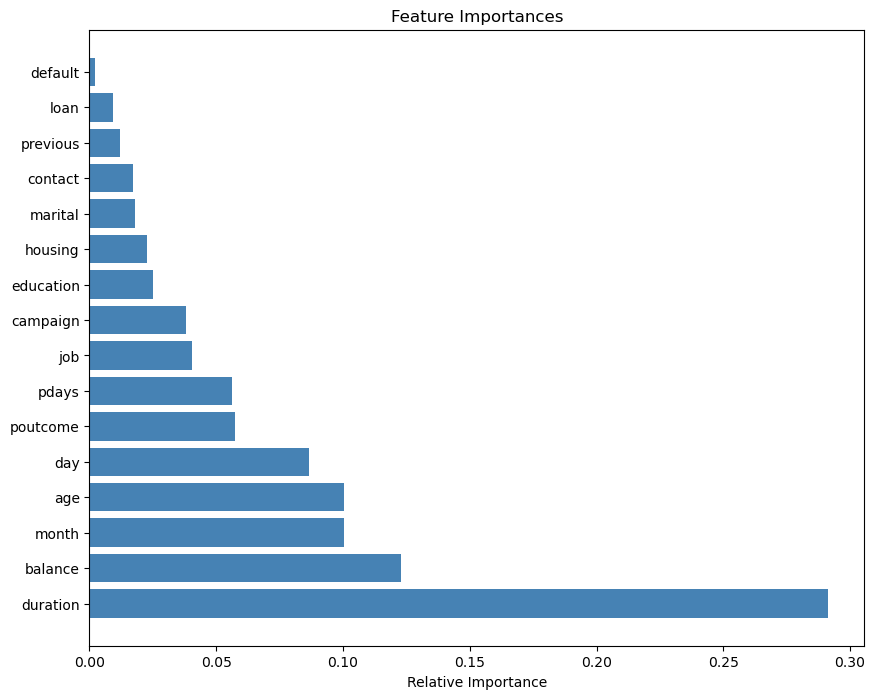

In [37]:
# ignore warnings 
import warnings
warnings.filterwarnings("ignore", message="`np.object` is a deprecated alias for the builtin `object`.")
# ignore warnings 


def plot_feature_importances(df, model):
    # Convert categorical features to numerical using LabelEncoder
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == np.object:
            df[column] = le.fit_transform(df[column])
    
    # Split the dataset into features and target variable
    X = df.drop('y', axis=1)
    y = df['y']
    
    # Fit the model to the data
    model.fit(X, y)
    
    # Get feature importances and sort in descending order
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns
    
    # Plot feature importances
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
model = DecisionTreeClassifier(random_state=42)
plot_feature_importances(dataset_raw, model)

#### Increasing the effecitiveness of the marketing campain

By looking at feature importance, this are the following items that the bank should consider in their future campains.

1) Incoporate a script for use during calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not. An agent script can increase the level of engagement in a phone call by providing personalized conversation starters, enabling the agent to connect with the caller on a deeper level. The script can also guide agents through a structured dialogue, ensuring that key points are addressed while maintaining a natural flow. Additionally, by incorporating active listening techniques and empathetic language, the agent script can help build rapport and trust, fostering a more engaging conversation and increase effectivness of campain. 


2) Months of Marketing Activity:  The dataset shows that majority of the Deposit terms were the months of March (52%), September (43%), October (46%) and December (46%) although the month of highest level of marketing activity was the month of May. Future marketing campains it will be wise for for the bank to focus the marketing campaign during the months of March, September, October and December.

3) Age : Retired clients (22%) and students(28.2%) have a high interest on deposits. Since age shows a high degree of feature importance, future marketing campagins should target younger and older potential customers. 

4) Day of the week: Feature importance shows that day of the week contacted was important. The dataset indicates that concontacted later in the week 'days' resulted in a yes

Integrating these approaches and narrowing down the target audience for the upcoming campaign should enhance the bank's marketing effectiveness compared to its present efforts.